In [185]:
from pymatgen import Structure
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.operations import SymmOp
import numpy as np
from jupyter_jsmol.pymatgen import quick_view
from IPython.display import Image

# Téléchargement du fichier CIF Cs2O

In [186]:
#pour télécharger le ﬁchier CIF du matériau qui vous a été attribué
with MPRester("WNdO6TZG8SzgeuFt") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-7988")
    
    w = CifWriter(structure,symprec=1e-5);
    w.write_file('Cs2O.cif')

In [187]:
#pour étudier l’effet de 3 éléments de symétrie différents (pas l’identité) chacun pour 1 atome différent
struct = Structure.from_file("Cs2O_mp-7988_symmetrized.cif")

# Coordonnées des atomes choisis

In [188]:
#On cherche les coordonnées cartésienne des atomes 
coords= struct.cart_coords

Cs_1 = coords[0]
O_2 = coords[6]
Cs_6 = coords[3]
print ("coordonnées de l'atome Cs (#1) :", Cs_1, "\n coordonnées de l'atome O (#2) : ",O_2, 
       "\n coordonnées de l'atome Cs (#6) :", Cs_6)

coordonnées de l'atome Cs (#1) : [0.         0.         5.82844505] 
 coordonnées de l'atome O (#2) :  [0. 0. 0.] 
 coordonnées de l'atome Cs (#6) : [2.13077092 1.23020116 1.52184898]


# Premier élément de symétrie : inversion

$$
\left(\begin{array}{cc} 
-1 & 0 & 0\\
0 & -1 & 0\\
0 & 0 & -1\\
\end{array}\right)
\left(\begin{array}{cc} 
x\\ 
y\\
z\\
\end{array}\right)
+ 
\left(\begin{array}{cc} 
0\\ 
0\\
0\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
-x \\ 
-y \\
-z \\
\end{array}\right)
$$

In [189]:
#1er élément de symétrie
Op1 = SymmOp.from_xyz_string('-x, -y, -z') #2
sym1 = Op1.operate(Cs_1)
print("Symétrie 1: inversion (n°2 du CIF)")
print('---------------------------------- \n')
print("La matrice de rotation associée à la symétrie '-x, -y, -z':\n",Op1.rotation_matrix)
print("Le vecteur de translation associé à la symétrie '-x, -y, -z':\n", Op1.translation_vector,"\n")
print("On applique la symétrie sur l'atome Cs (#1) :")
print("Atome de départ : ",str(Cs_1) )
print("Atome d'arrivée : ",str(sym1))


Symétrie 1: inversion (n°2 du CIF)
---------------------------------- 

La matrice de rotation associée à la symétrie '-x, -y, -z':
 [[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
Le vecteur de translation associé à la symétrie '-x, -y, -z':
 [0. 0. 0.] 

On applique la symétrie sur l'atome Cs (#1) :
Atome de départ :  [0.         0.         5.82844505]
Atome d'arrivée :  [ 0.          0.         -5.82844505]


In [190]:
view1 = quick_view(struct, "packed", supercell = [1,1,1])
display(view1)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [ ]:
#symétrie n°2 sur l'atome #1
view1.script("draw symop 2 {atomno=1}")

Symétrie 1


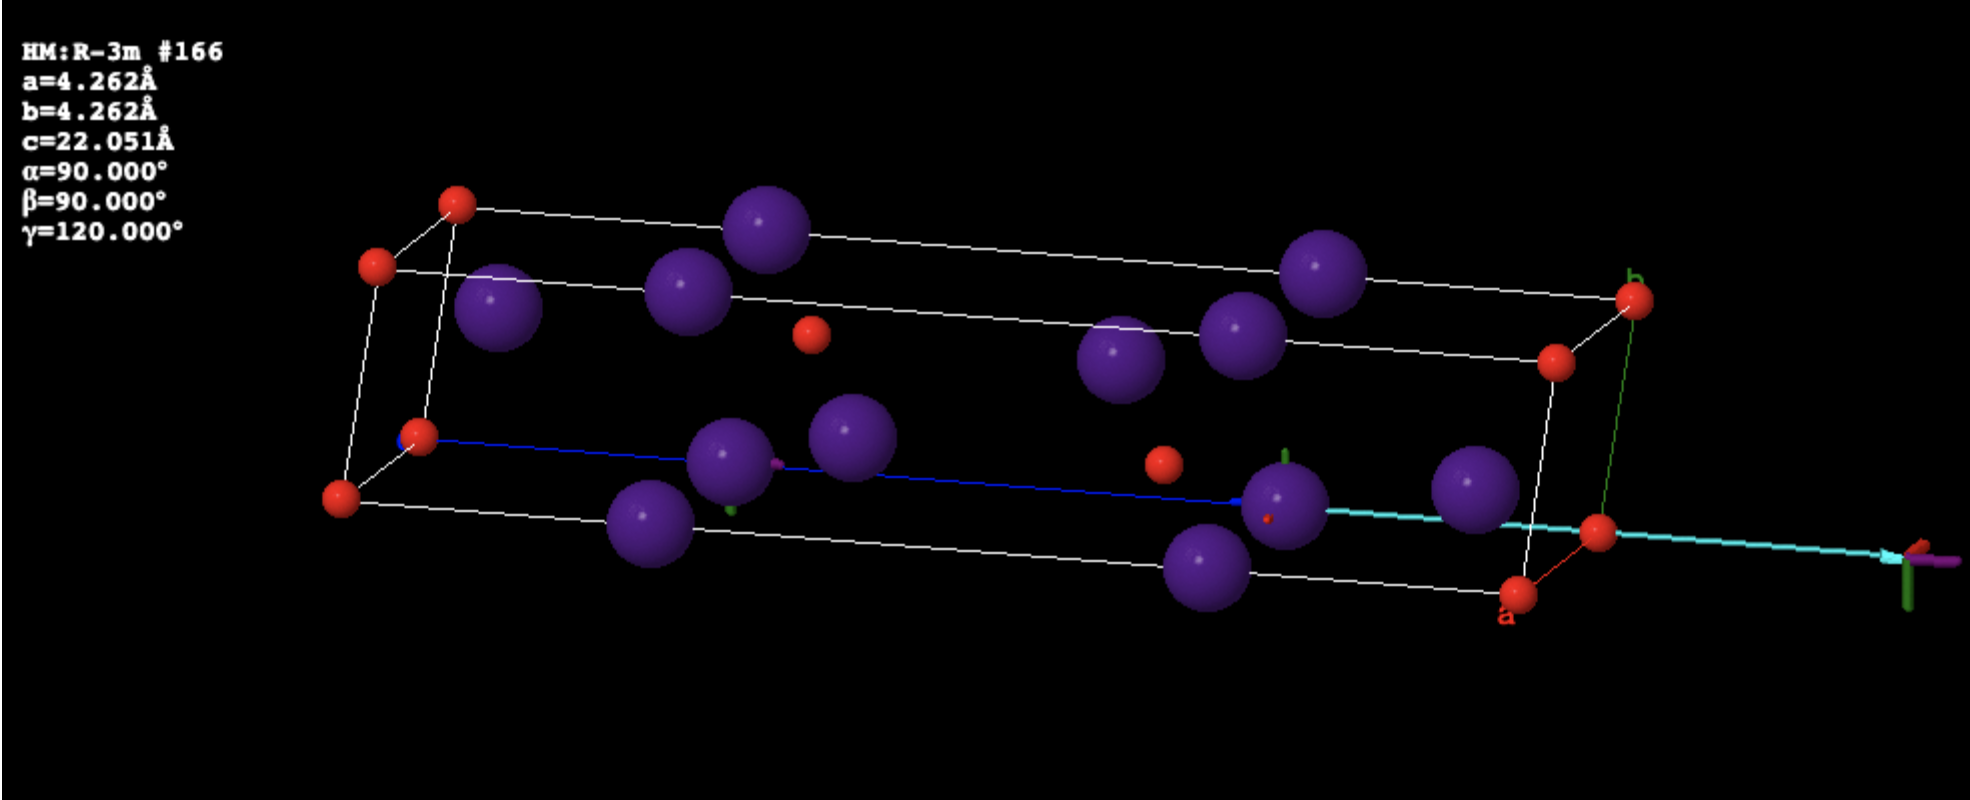

In [191]:
print("Symétrie 1")
Image(filename='view1.png')

# Deuxième élément de symétrie  : Translation

$$
\left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{array}\right)
\left(\begin{array}{cc} 
x\\ 
y\\
z\\
\end{array}\right)
+ 
\left(\begin{array}{cc} 
2/3\\ 
1/3\\
1/3\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
x+2/3 \\ 
y+1/3 \\
z+1/3 \\
\end{array}\right)
$$

In [192]:
#2ème élément de symétrie
Op2 = SymmOp.from_xyz_string('x+2/3, y+1/3, z+1/3') #13
sym2 = Op2.operate(O_2)
print("Symétrie 2: Translation (n°13 du CIF)")
print('---------------------------------- \n')
print("La matrice de rotation associée à la symétrie 'x+2/3, y+1/3, z+1/3':\n",Op2.rotation_matrix)
print("Le vecteur de translation associé à la symétrie 'x+2/3, y+1/3, z+1/3':\n", Op2.translation_vector,"\n")
print("On applique la symétrie sur l'atome O (#2) :")
print("Atome de départ : ",str(O_2) )
print("Atome d'arrivée : ",str(sym2))


Symétrie 2: Translation (n°13 du CIF)
---------------------------------- 

La matrice de rotation associée à la symétrie 'x+2/3, y+1/3, z+1/3':
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Le vecteur de translation associé à la symétrie 'x+2/3, y+1/3, z+1/3':
 [0.66666667 0.33333333 0.33333333] 

On applique la symétrie sur l'atome O (#2) :
Atome de départ :  [0. 0. 0.]
Atome d'arrivée :  [0.66666667 0.33333333 0.33333333]


In [193]:
view2 = quick_view(struct, "packed", supercell = [1,1,1])
display(view2)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [ ]:
#symétrie n°13 sur l'atome #2
view2.script("draw symop 13 {atomno=2}")

Symétrie 2


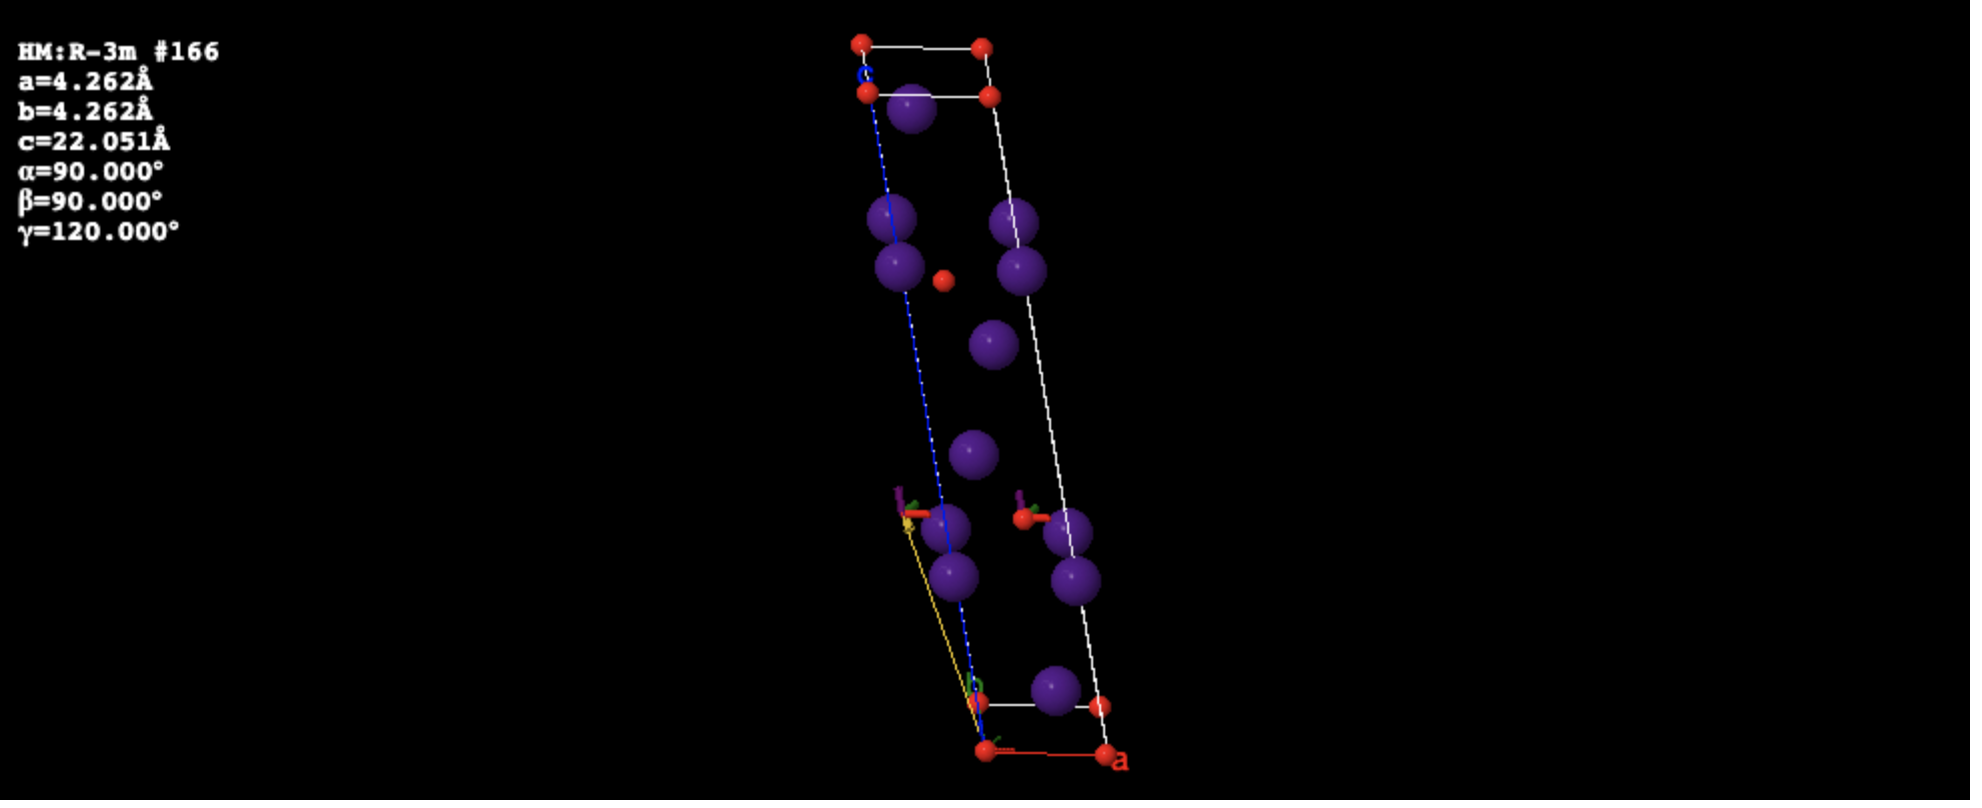

In [194]:
print("Symétrie 2")
Image(filename='view2.png')

# Troisième élément de symétrie : Plan miroir 

$$
\left(\begin{array}{cc} 
0 & -1 & 0\\
-1 & 0 & 0\\
0 & 0 & -1\\
\end{array}\right)
\left(\begin{array}{cc} 
x\\ 
y\\
z\\
\end{array}\right)
+ 
\left(\begin{array}{cc} 
0\\ 
0\\
0\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
-y \\ 
-x \\
z \\
\end{array}\right)
$$

In [195]:
#3ème élément de symétrie
Op3 = SymmOp.from_xyz_string('-y, -x, z') #8
sym3 = Op3.operate(Cs_6)
print("Symétrie 3: Plan miroir (n°8 du CIF)")
print('---------------------------------- \n')
print("La matrice de rotation associée à la symétrie ''-y, -x, z'':\n",Op3.rotation_matrix)
print("Le vecteur de translation associé à la symétrie ''-y, -x, z'':\n", Op3.translation_vector,"\n")
print("On applique la symétrie sur l'atome Cs (#6) :")
print("Atome de départ : ",str(Cs_6) )
print("Atome d'arrivée : ",str(sym3))


Symétrie 3: Plan miroir (n°8 du CIF)
---------------------------------- 

La matrice de rotation associée à la symétrie ''-y, -x, z'':
 [[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
Le vecteur de translation associé à la symétrie ''-y, -x, z'':
 [0. 0. 0.] 

On applique la symétrie sur l'atome Cs (#6) :
Atome de départ :  [2.13077092 1.23020116 1.52184898]
Atome d'arrivée :  [-1.23020116 -2.13077092  1.52184898]


In [196]:
view3 = quick_view(struct, "packed", supercell = [1,1,1])
display(view3)


JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [ ]:
#symétrie n°8 sur l'atome #6
view3.script("draw symop 8 {atomno=6}")

Symétrie 3


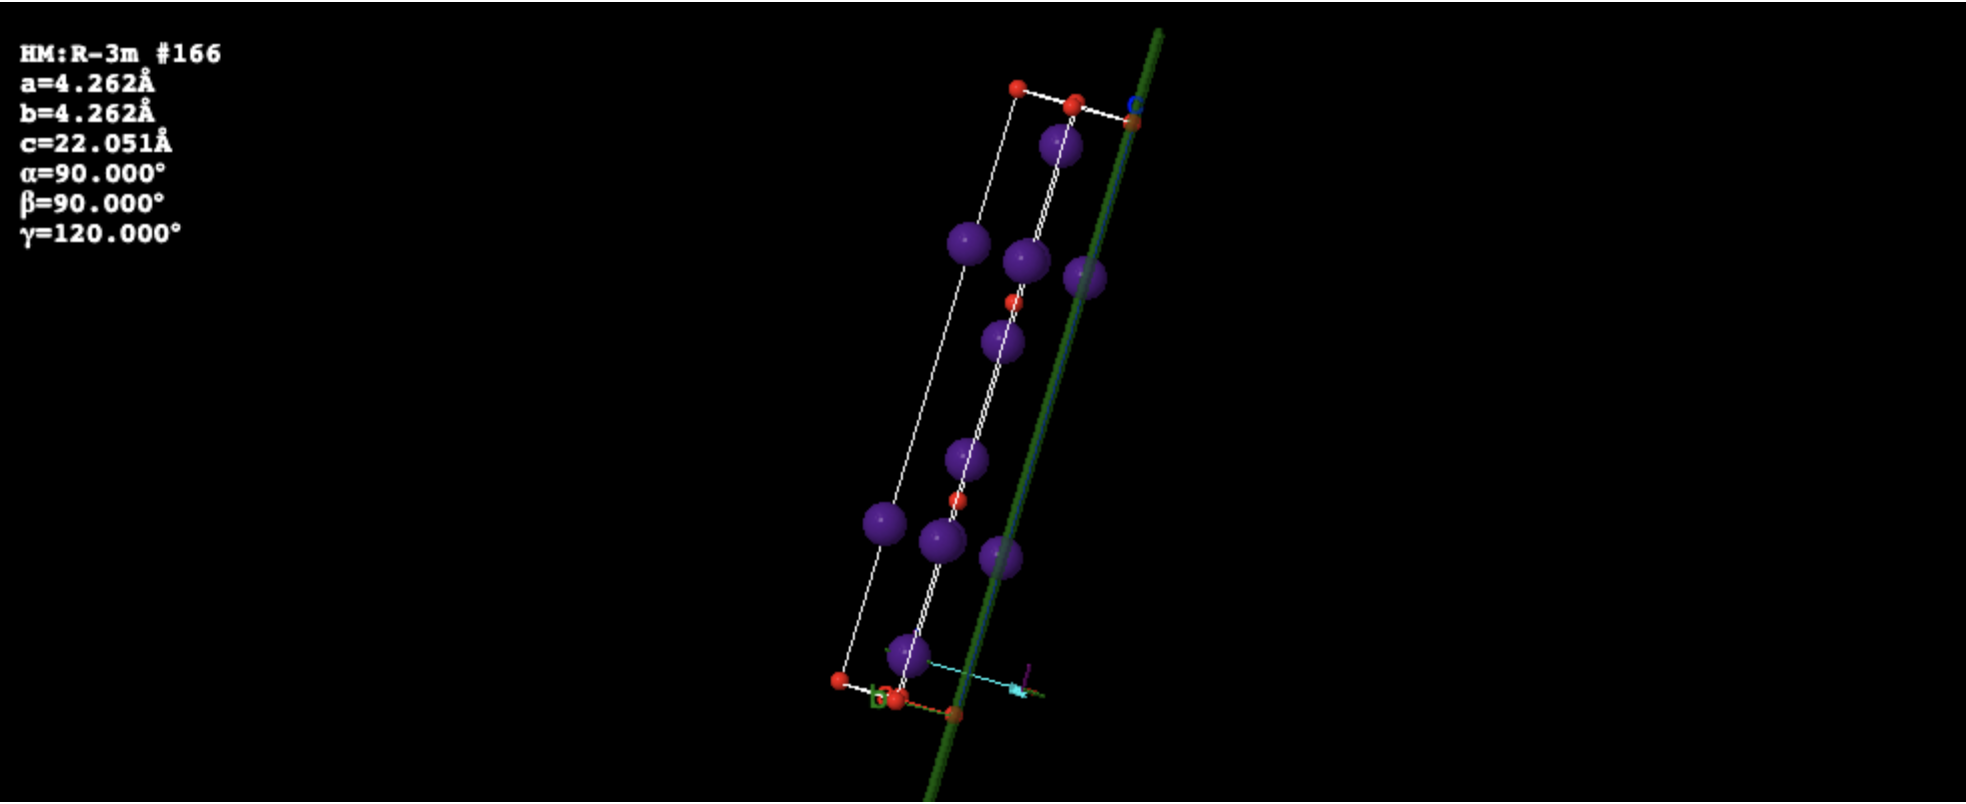

In [197]:
print("Symétrie 3")
Image(filename='view3.png')